<a href="https://colab.research.google.com/github/Jonah-30/Item-identifier-Cifar10-Neural-Network/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and datasets.

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

df = tf.keras.datasets.cifar10

# seperate dataset into inputs and outputs and training and testing
(x_train, y_train), (x_test, y_test) = df.load_data()

# normalize images by scaling the pixels from 0 to 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# the names of each classification
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Display sample images.

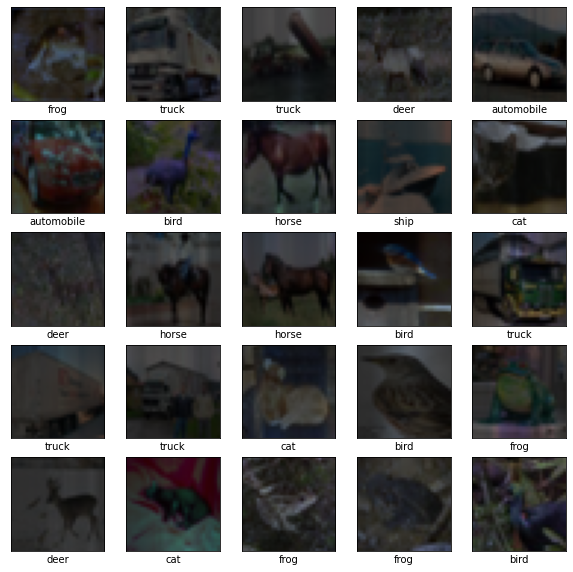

In [2]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Building the neural network.

In [3]:
model = tf.keras.models.Sequential()


# add convolution layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# add input layer and one dense layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))

# add output layer
model.add(tf.keras.layers.Dense(10))

# setup the back-propagation
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Training the neural network.

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_train, y_train))

Epoch 1/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7343 - accuracy: 0.7417 - val_loss: 0.7272 - val_accuracy: 0.7447
Epoch 2/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.7096 - accuracy: 0.7517 - val_loss: 0.7611 - val_accuracy: 0.7300
Epoch 3/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.6801 - accuracy: 0.7616 - val_loss: 0.6238 - val_accuracy: 0.7831
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6545 - accuracy: 0.7700 - val_loss: 0.5952 - val_accuracy: 0.7925
Epoch 5/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.6309 - accuracy: 0.7774 - val_loss: 0.5650 - val_accuracy: 0.8019
Epoch 6/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.6092 - accuracy: 0.7853 - val_loss: 0.5376 - val_accuracy: 0.8141
Epoch 7/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.5871 - accuracy: 0.7919 - val_loss: 0.5475 -

Evaluate the loss and accuracy of the testing dataset

313/313 - 5s - loss: 1.0458 - accuracy: 0.6838
1.0458118915557861 0.6837999820709229


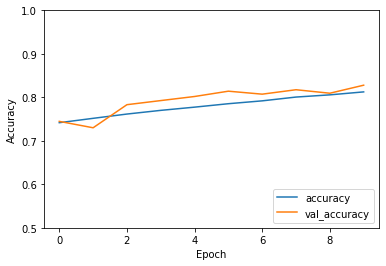

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(test_loss, test_acc)

Save the model.

In [5]:
model.save('image_classifier_net.model')
new_model = tf.keras.models.load_model('image_classifier_net.model')

INFO:tensorflow:Assets written to: image_classifier_net.model/assets


Plot the results on test set.

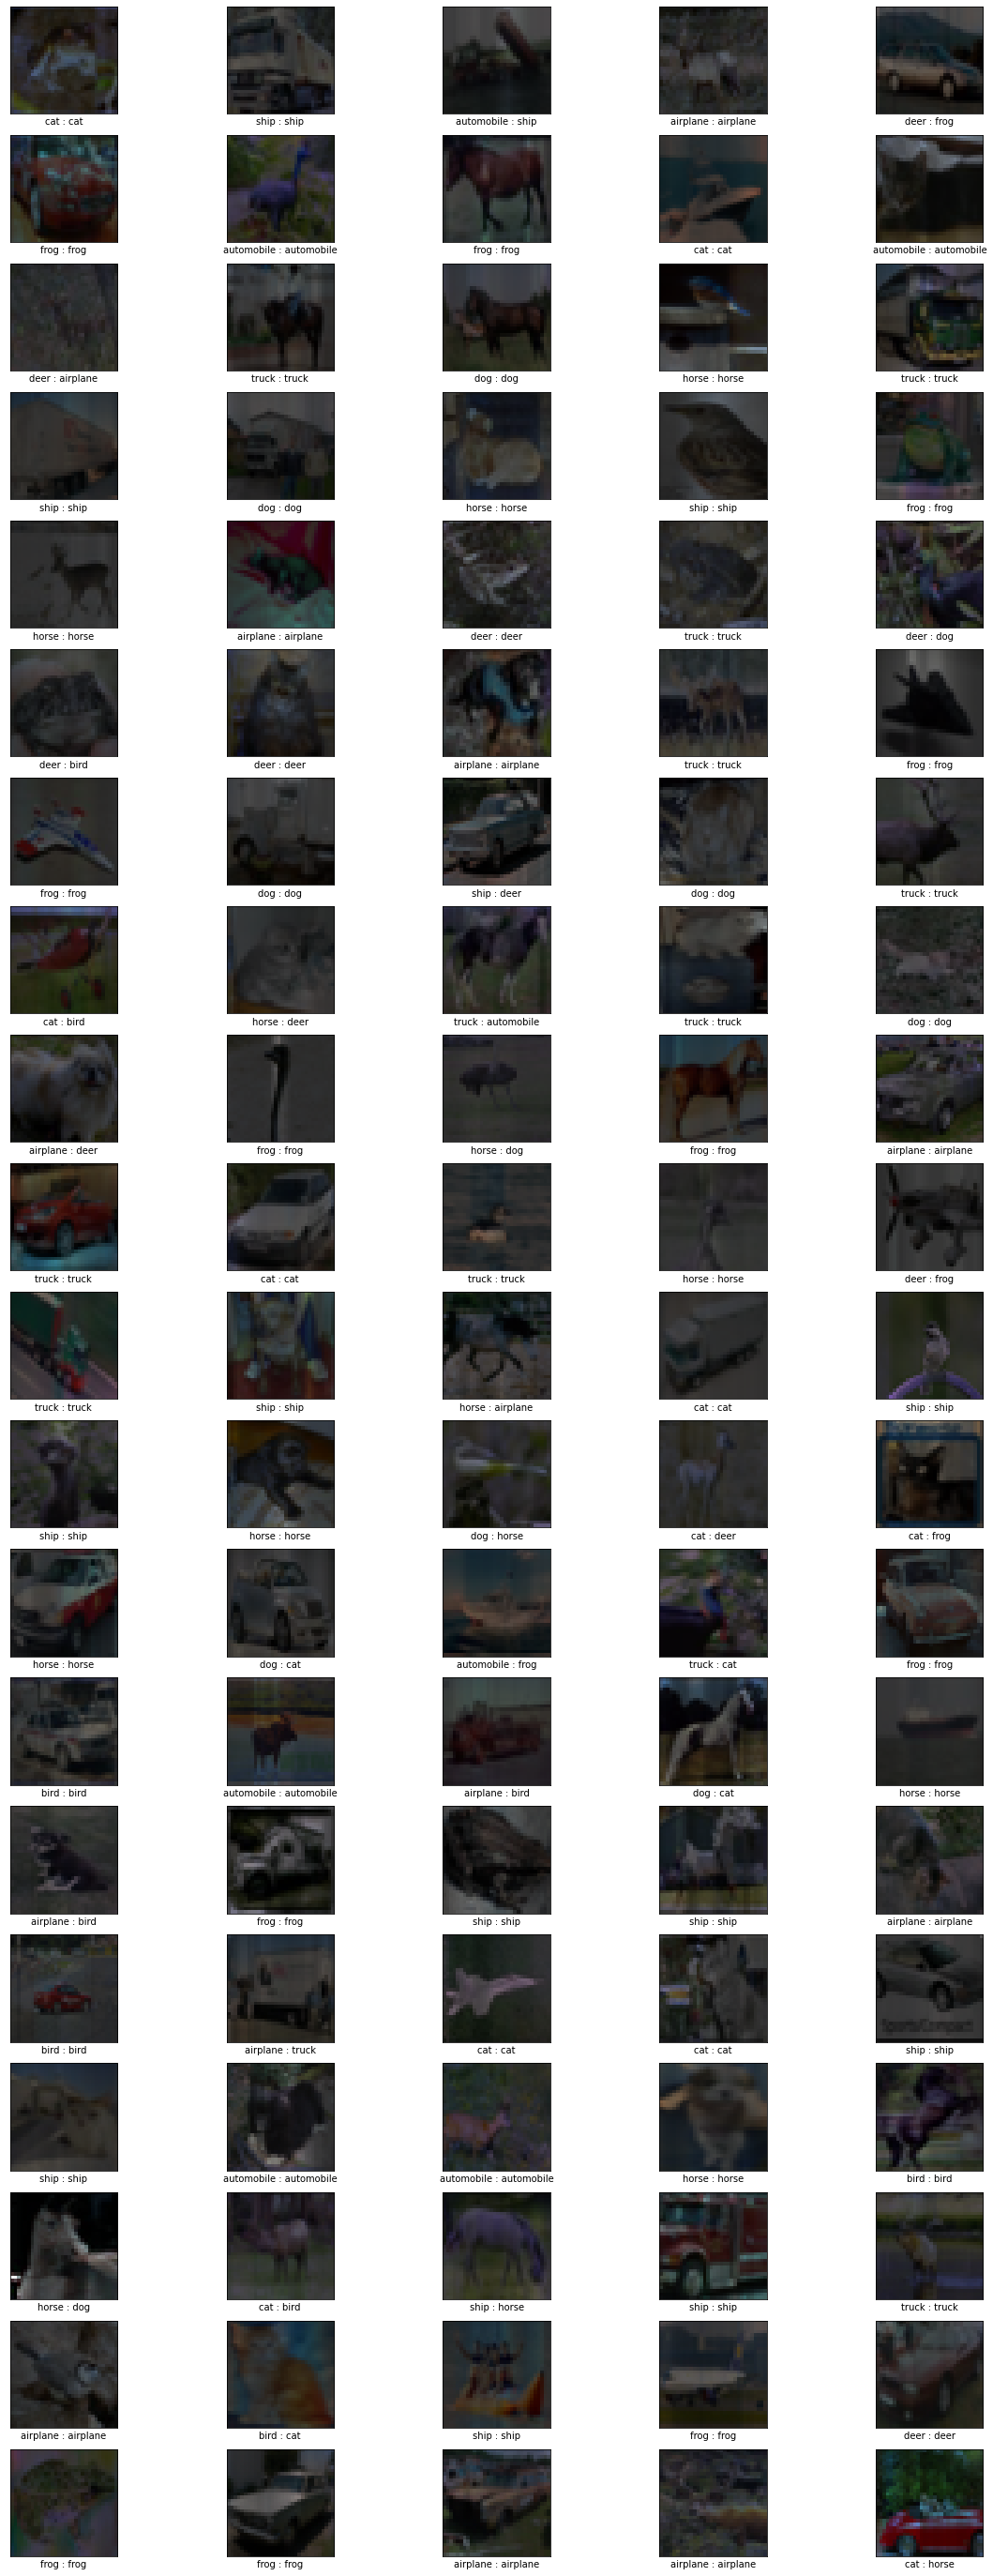

In [21]:
predictions=new_model.predict([x_test])
plt.figure(figsize=(20,50))
for i in range(100):
    plt.subplot(20,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])] + ' : '+ class_names[y_test[i][0]])
plt.show()

Use the model on the testing dataset.

Image


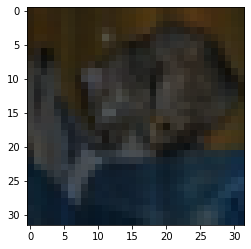

 
Model Prediction:
cat

Actual:
cat



In [24]:
for i in range(1):
  print('Image')
  plt.imshow(x_test[i])
  plt.show()
  print(' \nModel Prediction:')
  print(class_names[np.argmax(predictions[i])] + '\n')
  print('Actual:')
  print(class_names[y_test[i][0]] + '\n')